<a href="https://colab.research.google.com/github/proteinovayas13/My_works/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BD%D0%B0_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Провела аналитику профессий связанных с программированием.

In [3]:
! pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 22.8 MB/s eta 0:00:00


In [4]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

pd.options.display.max_columns = None # полностью отображаем столбцы
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [6]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [11]:
# Удаляю дубликаты
df.drop_duplicates(keep=False, inplace=True)

In [13]:
# Ключевые показатели
df.describe(include='object').T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


In [32]:
# Топ высокооплачиваемых должности (зарплата в долларах за год)
df.groupby('job_title')['salary_in_usd'].agg('count').sort_values(ascending=False)

,salary_in_usd
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Big Data Engineer,8
Machine Learning Scientist,8


Топ 5  высокооплачиваемых должности (в долларах):

Data Scientist  143

Data Engineer 132

Data Analyst 97

Machine Learning Engineer 41

Analytics Engineer 16



In [15]:
#  Корреляция? между онлайн и оффлайн работой
correlation = df['salary_in_usd'].corr(df['remote_ratio'])
print(f'Корреляция между удаленной работой и зарплатой: {correlation}')

Корреляция между удаленной работой и зарплатой: 0.1321223353942209


<Axes: xlabel='salary_in_usd', ylabel='company_size'>

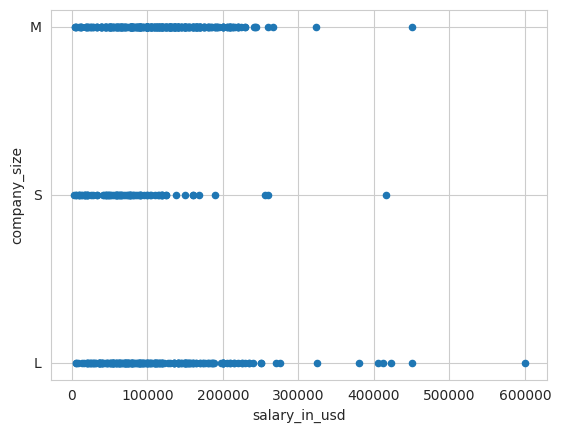

In [16]:
# Зависимость заработной платы  от размера предприятия?
df.plot.scatter(x = 'salary_in_usd', y = 'company_size')

Зависимость не высокая

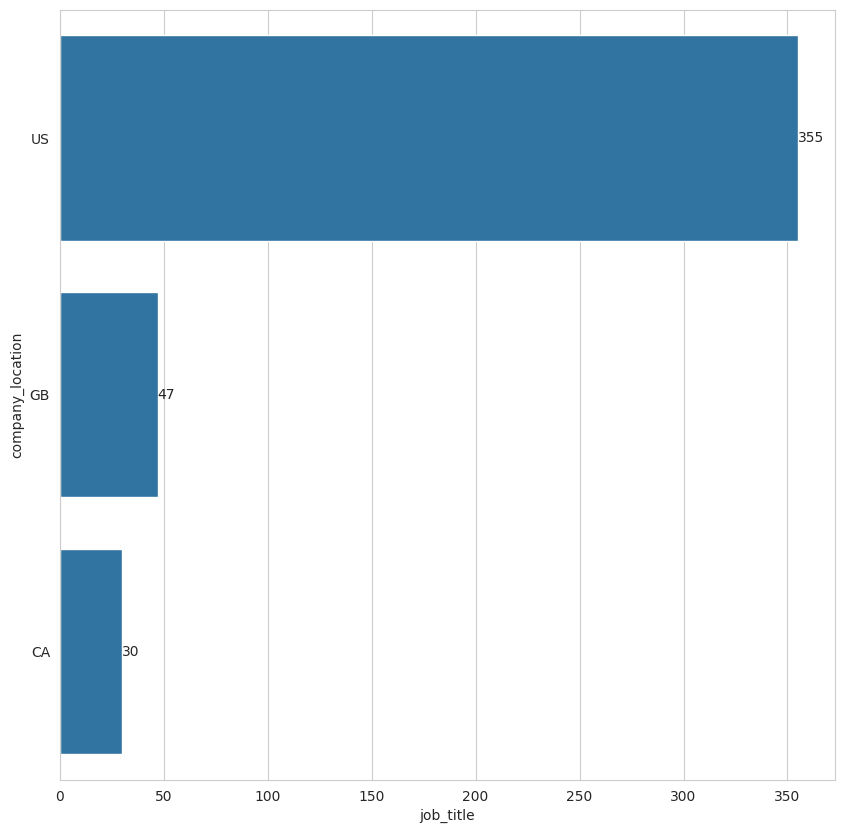

In [36]:
# Зависимость страны от колличества вакансий (топ 3)
temp = df.groupby('company_location')['job_title'].agg('count').sort_values(ascending=False)[:3]

plt.figure(figsize=(10,10))
ax = sns.barplot(x=temp, y=temp.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()

In [38]:
lowest_salary = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=True)[:3]
lowest_salary

,salary_in_usd
company_location,
IR,4000.0
VN,4000.0
KE,9272.0


In [35]:
# Группировка по регионам
df.groupby('company_location')['salary_in_usd'].agg(['sum', 'mean', 'max', 'min']).head(5)

,sum,mean,max,min
company_location,,,,
AE,300000,100000.000000,120000,65000
AS,18053,18053.000000,18053,18053
AT,291683,72920.750000,91237,61467
AU,324128,108042.666667,150000,86703
BE,171398,85699.000000,88654,82744


In [25]:
# Медианная зарплата для каждой должности
df.groupby(['job_title'])[['salary_in_usd']].median().head(5)

,salary_in_usd
job_title,
3D Computer Vision Researcher,5409.0
AI Scientist,45896.0
Analytics Engineer,179850.0
Applied Data Scientist,157000.0
Applied Machine Learning Scientist,56700.0


In [27]:
# Оцениваю как сильно изменились зарплаты в 2023 году, относительно 2020. Выявляю какие должности  стали более оплачиваемы, а какие нет?
df.groupby(['work_year'])[['salary_in_usd']].sum()

,salary_in_usd
work_year,
2020,6898536
2021,21668273
2022,39597998


Самый оплачиваемый год -2022 (39597998)


In [28]:
# Оцениваю как сильно изменились зарплаты в 2023 году, относительно 2020. Выявляю какие должности  стали более оплачиваемы, а какие нет?
result = df.groupby(['job_title', 'work_year'])['salary_in_usd'].agg(['mean', 'max', 'min']).reset_index()
print(result)

                        job_title  work_year       mean     max     min
0   3D Computer Vision Researcher       2021    5409.00    5409    5409
1                    AI Scientist       2020   45896.00   45896   45896
2                    AI Scientist       2021   24263.25   55000   12000
3                    AI Scientist       2022  160000.00  200000  120000
4              Analytics Engineer       2022  175000.00  205300  135000
..                            ...        ...        ...     ...     ...
93           Product Data Analyst       2020   13036.00   20000    6072
94             Research Scientist       2020  246000.00  450000   42000
95             Research Scientist       2021   83003.60  187442   50000
96             Research Scientist       2022  105569.00  144000   64849
97           Staff Data Scientist       2021  105000.00  105000  105000

[98 rows x 5 columns]


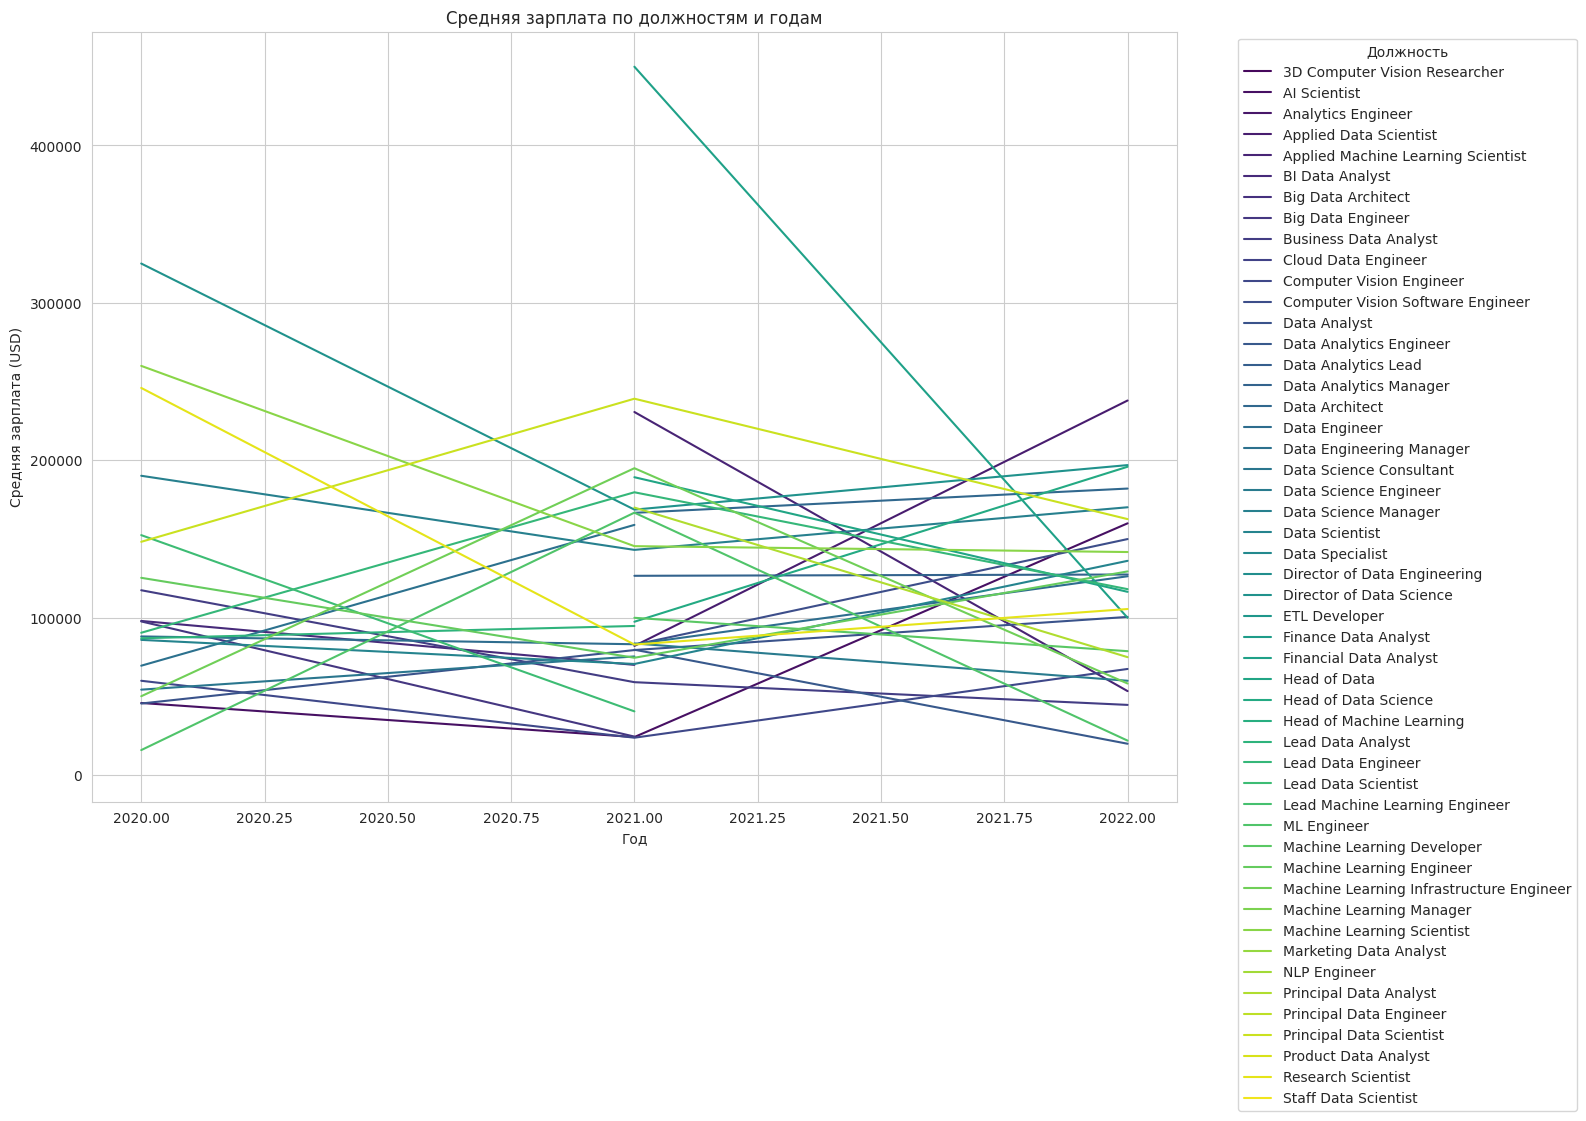

In [29]:
plt.figure(figsize=(14, 10))


# График средней зарплаты по должностям и годам
sns.lineplot(x='work_year', y='mean', hue='job_title', data=result, palette='viridis')
plt.title('Средняя зарплата по должностям и годам')
plt.xlabel('Год')
plt.ylabel('Средняя зарплата (USD)')
plt.legend(title='Должность', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()


# Портрет самого успешного и богатого работника:
1. Самая высокооплачиваемая профессия - Data Scientist 143, самая неооплачиваемая 3D Computer Vision Researcher(1 или меньше 1 тыс), скорее всего где то ошибка или не хватает данных ддя анализа .

2. Корреляция зарплаты между онлайн и оффлайн работниками в 0.13%, особой разницы нет.

3.  Самая популярная и высокооплачиваемая страна среди профессий -Америка (USA)
Самая низкооплачиваемая страна VN (Вьетнам) м IR (Иран)